Hessian for two class Gaussian mixture, cross entropy loss

\begin{align}
Y_i=\lambda v_0 +g_i\in \mathbb R^d, y_i=(1,0),\\
Y_i=\lambda v_1 +g_i\in \mathbb R^d, y_i=(0,1),\\
\end{align}
where $g_i$ are Gaussian vectors in $\mathbb R^d$ with variance $1/d$, $y=(y_0,y_1)\in \{0,1\}^2$.

The cross entropy loss is 
\begin{align}
 L((x_0, x_1),(Y,y))=-y_0 x_0\cdot Y-y_1 x_1\cdot Y+\log(e^{x_0\cdot Y+x_1\cdot Y})
\end{align}

The block Hessian matrix is given by

\begin{align}
\nabla_{x_b x_c}L=\left(\frac{e^{x_b \cdot Y}}{(\sum e^{x_a \cdot Y})}\delta_{bc}-\frac{e^{x_b \cdot Y}e^{x_c \cdot Y}}{(\sum e^{x_a \cdot Y})^2}\right)Y\otimes Y
\end{align}


In [35]:
import numpy as np
import matplotlib.pyplot as plt

def Hessian(x0, x1, Y):
    q0=np.exp(np.dot(x0,Y))
    q1=np.exp(np.dot(x1,Y))
    p0=q0/(q0+q1)
    p1=1-p0
    

    YY=np.outer(Y,Y)
    P=[[p0-p0*p1,-p0*p1],[-p0*p1,p1-p0*p1]]
    H=np.kron(P,YY)
    return H


In [40]:
def av_Hessian(x0, x1,v0,v1,la, y):
    m=len(y)
    d=len(x0)
    H=np.zeros((2*d,2*d))
    for i in range(m):
        Y=la*(y[i]*x0+(1-y[i])*x1)+np.random.normal(0,1,d)/np.sqrt(d)
        H=H+Hessian(x0,x1,Y)
    return H
    

Plot the first five eigenvalues of the Hessian matrix, 

[ 0.59735589  0.61821122  0.6703126   0.74149012  0.78295809  0.82460767
  0.87002487  0.88344509  0.90716754  0.92198743  0.96936251  1.01236818
  1.03715574  1.0618044   1.11619747  1.18377697  1.23478639  1.26380764
  1.29122097  1.31148377  1.31933488  1.38783704  1.4192522   1.45988632
  1.4722578   1.56726821  1.59777273  1.62115967  1.66747625  1.69724144
  1.75161445  1.80012164  1.84682719  1.8824666   1.95293609  1.97616542
  2.03980202  2.10035973  2.10456209  2.15656288  2.21579616  2.27136118
  2.30838981  2.37655815  2.4079504   2.43163779  2.46089038  2.50652831
  2.5809406   2.62876123  2.69504893  2.75646494  2.799441    2.84936802
  2.87673994  2.96582005  3.04942297  3.1195659   3.14347263  3.22088438
  3.29977647  3.32024604  3.38295496  3.47467241  3.55081838  3.65898236
  3.70420812  3.77414518  3.83323431  3.91786616  3.95886591  4.09486769
  4.15480138  4.19544665  4.40257036  4.49204676  4.60036588  4.65719514
  4.68928001  4.74363523  4.82715205  4.88211325  5

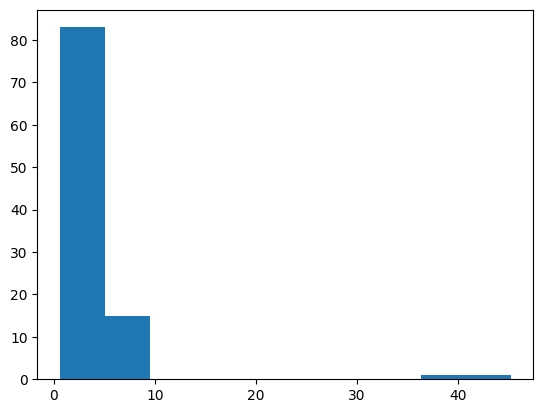

In [49]:
d=100
m=300
la=0.5

v0=np.zeros(d)
v0[0]=-1
v1=np.zeros(d)
v1[0]=1

y0=np.zeros(int(m/2))
y1=np.ones(int(m/2))
y=np.concatenate((y0,y1),axis=0)

x0=np.random.normal(0,1,d)/np.sqrt(d)
x1=np.random.normal(0,1,d)/np.sqrt(d)


H=av_Hessian(x0, x1,v0,v1,la, y)

eig=np.linalg.eigvalsh(H)
print(eig)
plt.hist(eig)
plt.show()




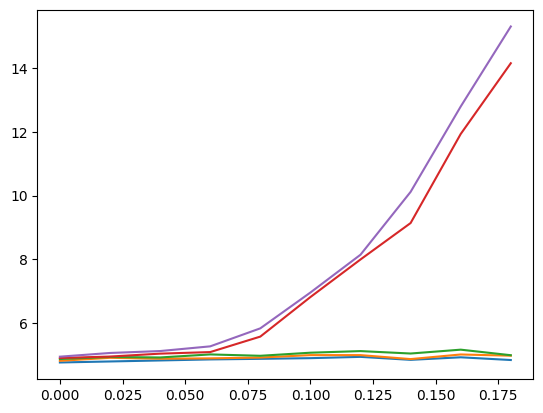

In [62]:
d=500
m=800
n=10
la=np.zeros(n)
for i in range(n):
    la[i]=i/(5*n)

v0=np.zeros(d)
v0[0]=-1
v1=np.zeros(d)
v1[0]=1

y0=np.zeros(int(m/2))
y1=np.ones(int(m/2))
y=np.concatenate((y0,y1),axis=0)

x0=np.random.normal(0,1,d)/np.sqrt(d)
x1=np.random.normal(0,1,d)/np.sqrt(d)

eig_list=np.zeros((n,5))

for i in range(n):
    H=av_Hessian(x0, x1,v0,v1,la[i], y)

    eig=np.linalg.eigvalsh(H)
    eig_list[i,:]=eig[-5:]
    
plt.plot(la,eig_list)
plt.show()


In [57]:
la

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [50]:
v=np.random.normal(0,1,10)

In [51]:
v[-5:]

array([ 0.27753365, -1.05088264,  2.8492145 ,  1.01439437,  1.26407188])

In [52]:
v

array([ 0.96367766, -1.85991098, -1.78517357,  0.30506818, -1.41231722,
        0.27753365, -1.05088264,  2.8492145 ,  1.01439437,  1.26407188])